In [34]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

In [1]:
from __future__ import absolute_import, division, print_function,\
unicode_literals

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
import numpy as np
from matplotlib import pyplot as plt

In [4]:
print(tf.__version__)

1.14.0


In [5]:
# Import Fashion MNIST Dataset
# 60000 imgs to train, 10000 imgs to evaluate
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) =\
    fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [6]:
# Four NumPy arrays: 28 x 28, with pixel values from 0 to 255
# Labels: {0,1,...,9}
class_names = ['T-shirt/top', 'Trouser', 'Pullover', \
               'Dress', 'Coat', 'Sandal', 'Shirt', \
               'Sneaker', 'Bag', 'Ankle boot']

In [8]:
# Explore data
train_images.shape

(60000, 28, 28)

In [9]:
len(train_labels)

60000

In [10]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [11]:
test_images.shape

(10000, 28, 28)

In [12]:
(len(test_labels))

10000

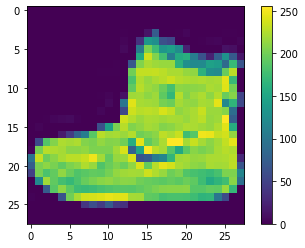

In [13]:
# Preprocess data
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [14]:
# Scale values to range of 0 to 1 before feeding to NN model.
train_images = train_images/255.0
test_images = test_images/255.0

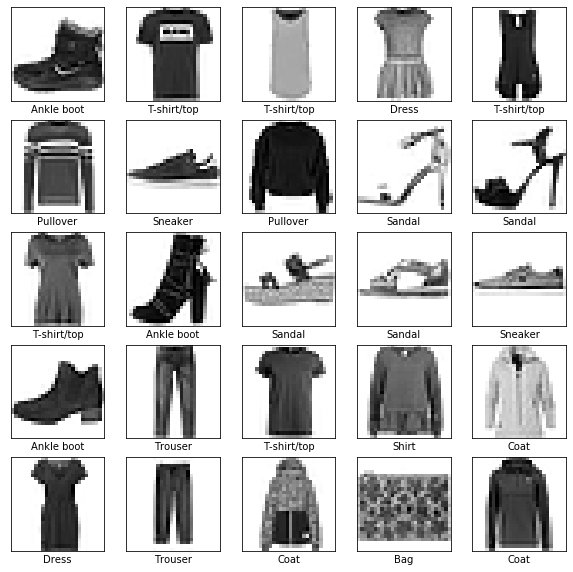

In [15]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [17]:
# Build Model
# Set up layers
model = keras.Sequential([
    # 2D -> 1D
    keras.layers.Flatten(input_shape=(28,28)),
    # Fully connected layer with 128 neurons
    keras.layers.Dense(128, activation='relu'),
    # Softmax layer -> 10 classes
    keras.layers.Dense(10, activation='softmax')
])

In [18]:
# Compile model
model.compile(optimizer='adam',\
             loss='sparse_categorical_crossentropy',\
             metrics=['accuracy'])

In [19]:
# Train model
train_hist = model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 34s 569us/sample - loss: 0.4945 - acc: 0.8260
Epoch 2/10
60000/60000 [==============================] - 32s 525us/sample - loss: 0.3719 - acc: 0.8650
Epoch 3/10
60000/60000 [==============================] - 32s 534us/sample - loss: 0.3362 - acc: 0.8766
Epoch 4/10
60000/60000 [==============================] - 32s 540us/sample - loss: 0.3109 - acc: 0.8849
Epoch 5/10
60000/60000 [==============================] - 31s 523us/sample - loss: 0.2938 - acc: 0.8913
Epoch 6/10
60000/60000 [==============================] - 31s 518us/sample - loss: 0.2790 - acc: 0.8965
Epoch 7/10
60000/60000 [==============================] - 33s 543us/sample - loss: 0.2690 - acc: 0.9003
Epoch 8/10
60000/60000 [==============================] - 30s 507us/sample - loss: 0.2572 - acc: 0.9047
Epoch 9/10
60000/60000 [==============================] - 31s 516us/sample - loss: 0.2489 - acc: 0.9071
Epoch 10/10
60000/60000 [==============================] - 31s 5

In [20]:
# Evaluate accuracy
test_loss, test_acc = model.evaluate(test_images,\
                                     test_labels,\
                                    verbose=2)
print('\nTest accuracy:', test_acc)

10000/10000 - 3s - loss: 0.3414 - acc: 0.8825

Test accuracy: 0.8825


In [21]:
# Make predictions
predictions = model.predict(test_images)

In [26]:
# Look at predictions
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = \
        predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(\
                            class_names[predicted_label],\
                            100*np.max(predictions_array),\
                            class_names[true_label]), \
                            color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = \
                predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, \
                           color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

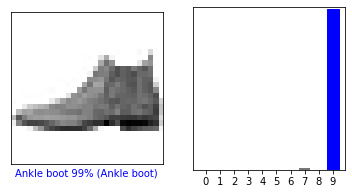

In [27]:
# Look at 0th img, predictions, and prediction array
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

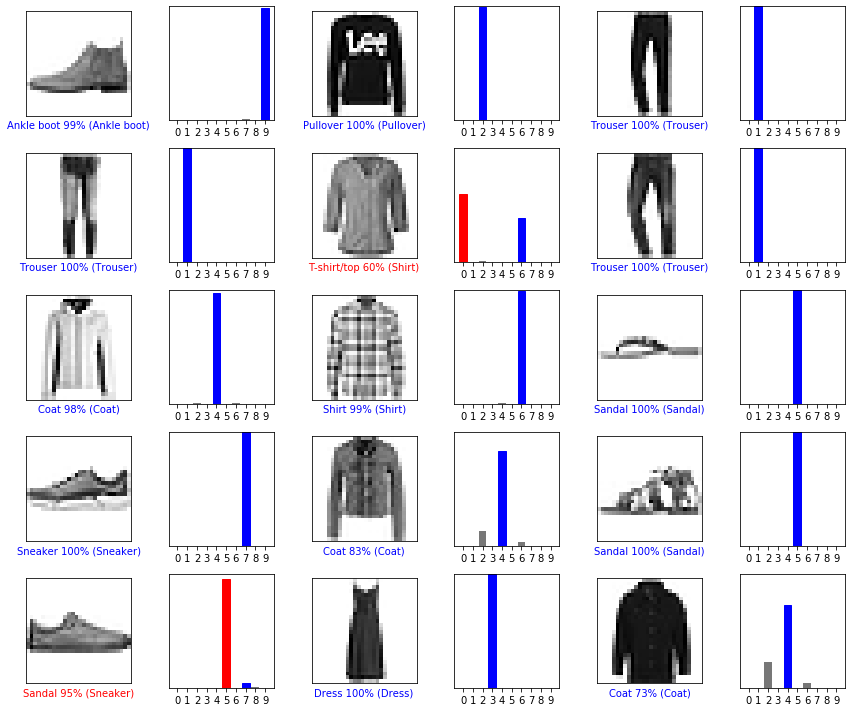

In [28]:
# Plot the first X test images, their predicted labels, and the 
# true labels. Color correct preds in blue and incorrect preds
# in red.
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [29]:
# Make a prediction about a single image.
# Grab an image from the test dataset.
img = test_images[1]
print(img.shape)

(28, 28)


In [30]:
# Add the image to a batch where it is the only member.
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [32]:
# Predict correct label for this image.
predictions_single = model.predict(img)
print(predictions_single)

[[4.5584704e-05 3.7955533e-16 9.9878663e-01 1.7081933e-10 8.5393555e-04
  7.2564948e-10 3.1384916e-04 1.6463304e-16 9.1564936e-11 1.6383160e-14]]


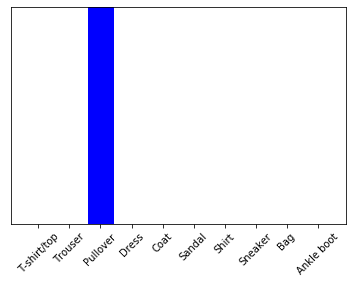

In [33]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)